<a href="https://colab.research.google.com/github/zwt4pb/dsprojectjterm2/blob/main/popularwordcloud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


Processing Justin Bieber's most popular song...
Song URL for Justin Bieber: https://genius.com/Justin-bieber-love-yourself-lyrics

Lyrics for Justin Bieber's most popular song:

[Verse 1]
For all the times that you rained on my parade
And all the clubs you get in using my name
You think you broke my heart, oh girl, for goodness' sake
You think I'm cryin' on my own, well, I ain't
[Refrain]
And I didn't wanna write a song
'Cause I didn't want anyone thinking I still care
I don't, but you still hit my phone up
And baby, I'll be movin' on
And I think you should be somethin' I don't wanna hold back
Maybe you should know that
[Pre-Chorus]
My mama don't like you and she likes 


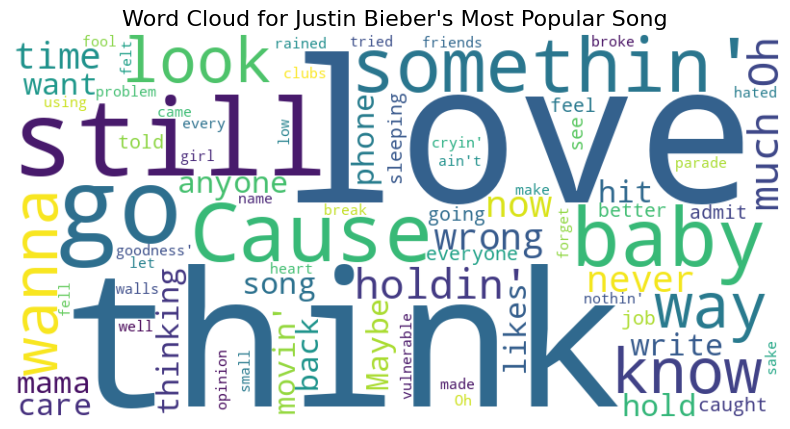


Processing Lady Gaga's most popular song...
Song URL for Lady Gaga: https://genius.com/Lady-gaga-and-bradley-cooper-shallow-lyrics

Lyrics for Lady Gaga's most popular song:

[Verse 1: Bradley Cooper]
Tell me somethin', girl
Are you happy in this modern world?
Or do you need more?
Is there somethin' else you're searchin' for?
[Refrain: Bradley Cooper]
I'm fallin'
In all the good times, I find myself longin'
For change
And, in the bad times, I fear myself
[Verse 2: Lady Gaga]
Tell me something, boy
Aren't you tired tryna fill that void?
Or do you need more?
Ain't it hard keepin' it so hardcore?
[Refrain: Lady Gaga]
I'm falling
In all the good times, I find myself long


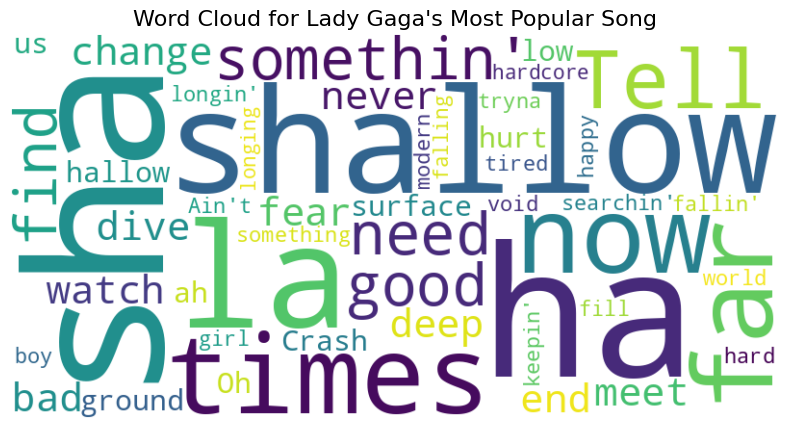


Processing The Weeknd's most popular song...
Song URL for The Weeknd: https://genius.com/The-weeknd-the-hills-lyrics

Lyrics for The Weeknd's most popular song:

[Intro]
Yeah
Yeah
Yeah
[Verse 1]
Your man on the road, he doin' promo
You said, "Keep our business on the low-low"
I'm just tryna get you out the friend zone
'Cause you look even better than the photos
I can't find your house, send me the info
Drivin' through the gated residential
Found out I was comin', sent your friends home
Keep on tryna hide it, but your friends know
[Chorus]
I only call you when it's half-past five
The only time that I'll be by your side
I only love it when you touch me, no


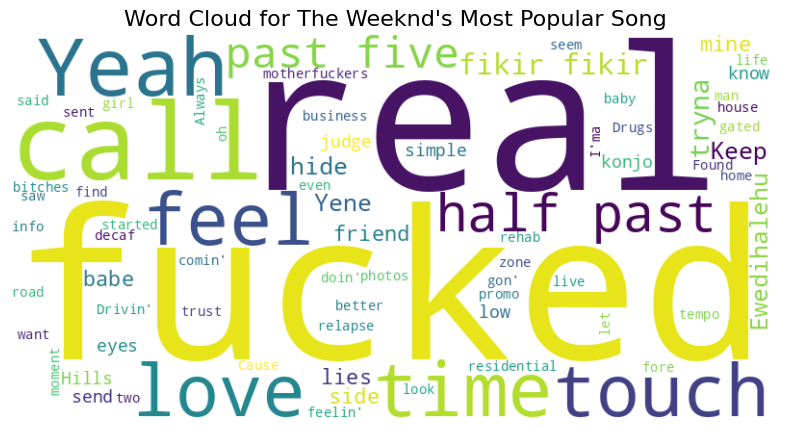

In [24]:
import requests
from bs4 import BeautifulSoup
from wordcloud import WordCloud
import matplotlib.pyplot as plt
import re
GENIUS_ACCESS_TOKEN = "Eg6bsX5D1UfDoP27tc3rBSmCwfm6a0maR680AwkKiFQDDe4brbD_u9Dd6WTdRYqU"

def get_song_url(artist_name):
    """
    Use Genius API to search for the most popular song by the artist.
    """
    base_url = "https://api.genius.com"
    headers = {"Authorization": f"Bearer {GENIUS_ACCESS_TOKEN}"}
    search_url = f"{base_url}/search"
    params = {"q": artist_name}

    response = requests.get(search_url, headers=headers, params=params)
    if response.status_code == 200:
        data = response.json()
        hits = data['response']['hits']
        for hit in hits:
            if artist_name.lower() in hit['result']['primary_artist']['name'].lower():
                return hit['result']['url']
    return None

def fetch_lyrics(song_url):
    """
    Scrape the Genius page to extract lyrics.
    """
    response = requests.get(song_url)
    if response.status_code != 200:
        print(f"Failed to fetch page: {response.status_code}")
        return None

    soup = BeautifulSoup(response.text, 'html.parser')
    lyrics_divs = soup.find_all("div", {"data-lyrics-container": "true"})
    if lyrics_divs:
        lyrics = "\n".join([div.get_text(separator="\n") for div in lyrics_divs])
        return lyrics.strip()

    print("Lyrics not found in the page structure.")
    return None

def generate_wordcloud(lyrics, title, exclude_words=None):
    """
    Generate a word cloud from the lyrics, excluding specific words
    and removing text inside square brackets.
    """
    if not lyrics:
        print(f"No lyrics available for generating word cloud: {title}")
        return

    lyrics = re.sub(r'\[.*?\]', '', lyrics)

    if exclude_words is None:
        exclude_words = []

    for word in exclude_words:
        lyrics = lyrics.replace(word, "")

    try:
        wordcloud = WordCloud(width=800, height=400, background_color="white").generate(lyrics)
        plt.figure(figsize=(10, 5))
        plt.imshow(wordcloud, interpolation="bilinear")
        plt.axis("off")
        plt.title(f"Word Cloud for {title}", fontsize=16)
        plt.show()
    except Exception as e:
        print(f"Error generating word cloud: {e}")

artists = ["Justin Bieber", "Lady Gaga", "The Weeknd"]

for artist in artists:
    print(f"\nProcessing {artist}'s most popular song...")

    song_url = get_song_url(artist)
    if not song_url:
        print(f"Could not find a song URL for {artist}")
        continue

    print(f"Song URL for {artist}: {song_url}")

    lyrics = fetch_lyrics(song_url)
    if not lyrics:
        print(f"Lyrics could not be fetched for {artist}")
        continue

    print(f"\nLyrics for {artist}'s most popular song:\n")
    print(lyrics[:500])

    exclude_words = ["Lady", "Gaga"] if artist == "Lady Gaga" else []
    generate_wordcloud(lyrics, f"{artist}'s Most Popular Song", exclude_words)
